# Lab 6: Clustering

In this assignment, we will learn two clustering methods: K-means and  Agglomerative method. 

Please first study the given example, which applies K-means and Agglomerative method to a toy dataset. 

Based on this example, your task is to apply K-means and Agglomerative method to the heart disease dataset. 


## 1. Example

### 1.1 Generate a toy dataset with two clusters

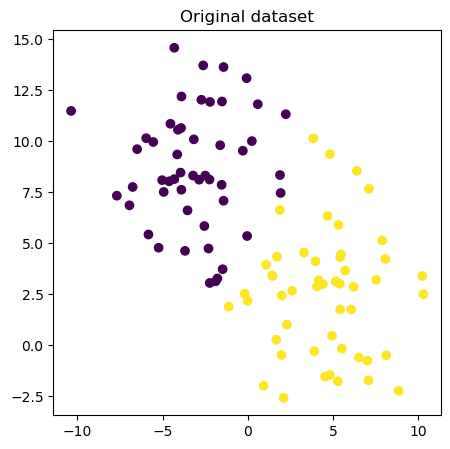

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets


# generate a toy dataset with two clusters
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=3.0, random_state=42)
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original dataset')
plt.show()

### 1.2 Partition the dataset with K-means 

Here, we use K-means method to partition this toy dataset. Then, to evaluate the clustering performance, we use two methods. The first one is to visualize the partitioned dataset. 

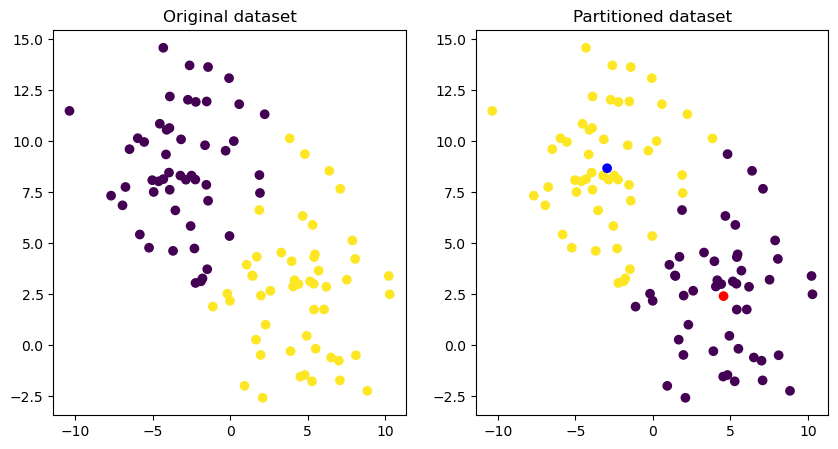

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

cluster = KMeans(n_clusters=2, random_state=0).fit(X)

centroids = cluster.cluster_centers_  #get the clustering centroids

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original dataset')

plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=cluster.labels_)
plt.scatter(centroids[:, 0], centroids[:, 1], c=['r', 'b'])  #visualize the clustering centroids
plt.title('Partitioned dataset')

plt.show()



The second method to evaluate the clustering performance is to use [normalized mutual information (NMI)](https://course.ccs.neu.edu/cs6140sp15/7_locality_cluster/Assignment-6/NMI.pdf)
The larger value indicates the better performance. 


In [3]:
from sklearn.metrics.cluster import normalized_mutual_info_score

nmi = normalized_mutual_info_score(cluster.labels_, y, average_method='arithmetic')
print('The normalized mutual information score of the K-means method is {:.4f}'.format(nmi))

The normalized mutual information score of the K-means method is 0.9291


### 1.3 Partition the dataset with Agglomerative method

Then, we use the Agglomerative method to partition the toy dataset.

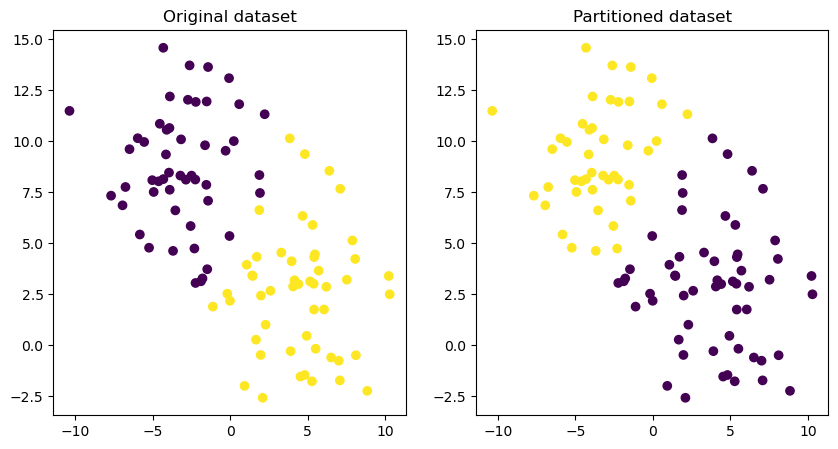

The normalized mutual information score of the Agglomerative method  is 0.6987


In [4]:
cluster = AgglomerativeClustering(n_clusters=2).fit(X)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original dataset')

plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=cluster.labels_)
plt.title('Partitioned dataset')

plt.show()

nmi = normalized_mutual_info_score(cluster.labels_, y, average_method='arithmetic')
print('The normalized mutual information score of the Agglomerative method  is {:.4f}'.format(nmi))

## 2. Task

In this task, we still use the [heart disease](./heart.csv) dataset in Lab Assignment 5. 
Each sample has the following feature: 

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


**The task is to partition all users into two groups with K-means and Agglomerative methods.**

### 2.1 Preprocess the raw data

* Check whether there are missing values
* Check whether theare are cateogrical features


In [5]:
# your code
import pandas as pd
import numpy as np

heart = '/kaggle/input/heartcsv/Lab04/heart.csv'
df = pd.read_csv(heart)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [7]:
category = [col for col in df.columns if df[col].unique().size < 5]
category

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'target']

### 2.2 Partition the dataset with K-means and compute its NMI


In [8]:
from sklearn.preprocessing import StandardScaler

X,y = df.drop(columns=['target']).to_numpy(),df.target.to_numpy()

# X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
normalizer = StandardScaler()
X = normalizer.fit_transform(X)
X.shape,type(X)

((303, 13), numpy.ndarray)

In [9]:
y.shape,type(y)
np.unique(y)

array([0, 1])

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
X_r.shape

(303, 2)

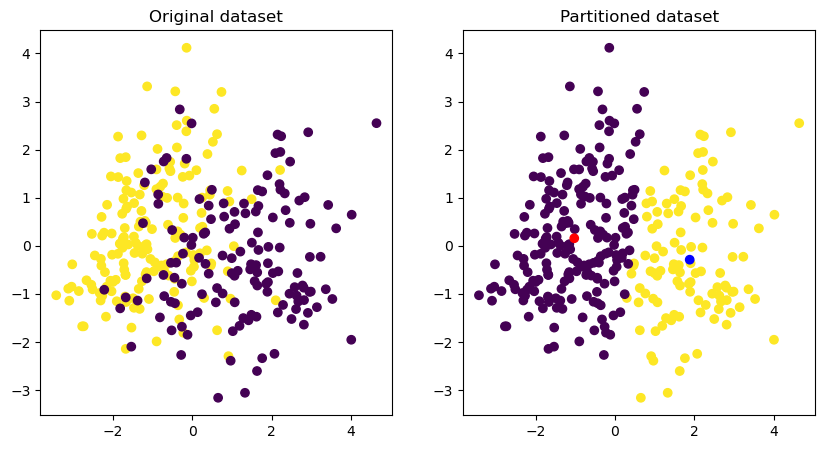

In [11]:
# your code

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

cluster = KMeans(n_clusters=2, random_state=0).fit(X_r)
# TO DO use pca
centroids = cluster.cluster_centers_  #get the clustering centroids

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(X_r[:, 0], X_r[:, 1], c=y)
plt.title('Original dataset')

plt.subplot(1,2,2)
plt.scatter(X_r[:, 0], X_r[:, 1], c=cluster.labels_)
plt.scatter(centroids[:, 0], centroids[:, 1], c=['r', 'b'])  #visualize the clustering centroids
plt.title('Partitioned dataset')

plt.show()

In [12]:
from sklearn.metrics.cluster import normalized_mutual_info_score

nmi = normalized_mutual_info_score(cluster.labels_, y, average_method='arithmetic')
print('The normalized mutual information score of the K-means method is {:.4f}'.format(nmi))

The normalized mutual information score of the K-means method is 0.3043


### 2.3 Partition the dataset with Agglomerative method and compute its NMI


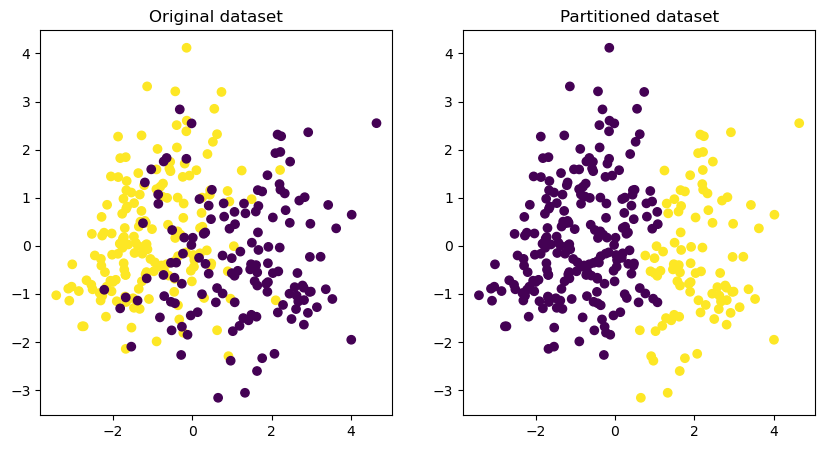

The normalized mutual information score of the Agglomerative method  is 0.3064


In [13]:
# your code

cluster = AgglomerativeClustering(n_clusters=2).fit(X_r)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(X_r[:, 0], X_r[:, 1], c=y)
plt.title('Original dataset')

plt.subplot(1,2,2)
plt.scatter(X_r[:, 0], X_r[:, 1], c=cluster.labels_)
plt.title('Partitioned dataset')
plt.show()

nmi = normalized_mutual_info_score(cluster.labels_, y, average_method='arithmetic')
print('The normalized mutual information score of the Agglomerative method  is {:.4f}'.format(nmi))